In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read training data file
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')
#make sure csv file is in the same folder as the notebook

trainData.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [3]:
trainData.shape

(137, 43)

In [4]:
testData.shape

(100000, 42)

In [5]:
print(trainData.var())

Id         1.575500e+03
P1         8.470374e+00
P2         2.294923e+00
P3         1.065720e+00
P4         1.033196e+00
P5         1.463182e+00
P6         4.554959e+00
P7         5.275333e+00
P8         3.454272e+00
P9         3.366466e+00
P10        3.413482e+00
P11        3.651030e+00
P12        3.770073e+00
P13        1.074388e+00
P14        7.450623e+00
P15        5.753650e+00
P16        1.229068e+01
P17        4.123658e+00
P18        1.089362e+01
P19        3.141005e+01
P20        1.374957e+01
P21        4.213289e+00
P22        1.514599e+00
P23        2.079004e+01
P24        5.308931e+00
P25        4.550451e+00
P26        6.822671e+00
P27        4.272649e+00
P28        5.330587e+00
P29        2.825381e+00
P30        3.065447e+01
P31        1.233480e+01
P32        2.735412e+01
P33        2.885036e+00
P34        2.667819e+01
P35        1.180796e+01
P36        1.737398e+01
P37        3.206848e+00
revenue    6.636145e+12
dtype: float64


In [6]:
#Data description
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [7]:
trainData.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [8]:
#checking number of null values
trainData.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [9]:
trainData['revenue'].value_counts()

5787594.0     1
16549064.0    1
3445076.0     1
3273041.0     1
3347767.0     1
             ..
2025297.0     1
5337526.0     1
3008199.0     1
4263629.0     1
3727364.0     1
Name: revenue, Length: 137, dtype: int64

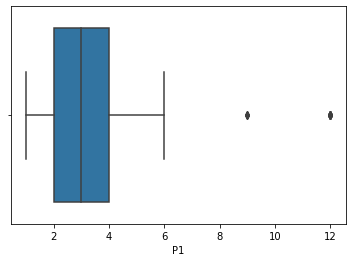

In [42]:
sns.boxplot(x=trainData["P1"])

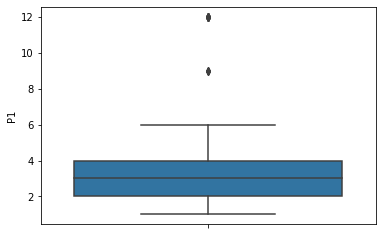

In [11]:
sns.boxplot(y=trainData["P1"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2745868f460>,
 'caps': [<matplotlib.lines.Line2D at 0x2745868fb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2745868f100>,
 'medians': [<matplotlib.lines.Line2D at 0x27458699220>,
 'fliers': [<matplotlib.lines.Line2D at 0x27458699520>,
 'means': []}

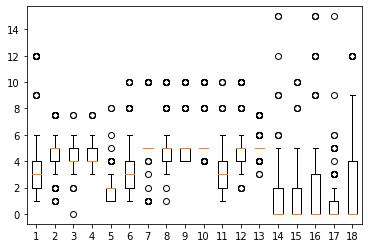

In [40]:
# sns.boxplot(y=trainData["P2"])

y1 = trainData["P1"]
y2 = trainData["P2"]
y3 = trainData["P3"]
y4 = trainData["P4"]
y5 = trainData["P5"]
y6 = trainData["P6"]
y7 = trainData["P7"]
y8 = trainData["P8"]
y9 = trainData["P9"]
y10 = trainData["P10"]
y11 = trainData["P11"]
y12 = trainData["P12"]
y13 = trainData["P13"]
y14 = trainData["P14"]
y15 = trainData["P15"]
y16 = trainData["P16"]
y17 = trainData["P17"]
y18 = trainData["P18"]
y19 = trainData["P19"]
y20 = trainData["P20"]
y21 = trainData["P21"]
y22 = trainData["P22"]
y23 = trainData["P23"]
y24 = trainData["P24"]
y25 = trainData["P25"]
y26 = trainData["P26"]
y27 = trainData["P27"]
y28 = trainData["P28"]
y29 = trainData["P29"]
y30 = trainData["P30"]
y31 = trainData["P31"]
y32 = trainData["P32"]
y33 = trainData["P33"]
y34 = trainData["P34"]
y35 = trainData["P35"]
y36 = trainData["P36"]
y37 = trainData["P37"]
# y38 = trainData["P38"]

plt.boxplot ([y1, y2, y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18])

{'whiskers': [<matplotlib.lines.Line2D at 0x27458178730>,
 'caps': [<matplotlib.lines.Line2D at 0x27458178df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x274581783d0>,
 'medians': [<matplotlib.lines.Line2D at 0x274581894f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x274581897f0>,
 'means': []}

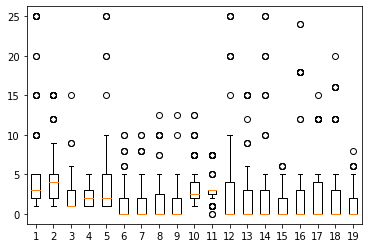

In [38]:
y19 = trainData["P19"]
y20 = trainData["P20"]
y21 = trainData["P21"]
y22 = trainData["P22"]
y23 = trainData["P23"]
y24 = trainData["P24"]
y25 = trainData["P25"]
y26 = trainData["P26"]
y27 = trainData["P27"]
y28 = trainData["P28"]
y29 = trainData["P29"]
y30 = trainData["P30"]
y31 = trainData["P31"]
y32 = trainData["P32"]
y33 = trainData["P33"]
y34 = trainData["P34"]
y35 = trainData["P35"]
y36 = trainData["P36"]
y37 = trainData["P37"]
# y38 = trainData["P38"]

plt.boxplot ([y19, y20, y21,y22,y23,y24,y25,y26,y27,y28,y29,y30,y31,y32,y33,y34,y35,y36,y37])

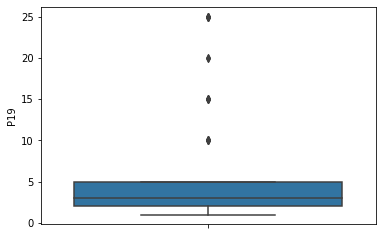

In [41]:
sns.boxplot(y=trainData["P19"])

In [ ]:
#EDA ENDS HERE

In [32]:
for i in range (39):
    print ('y'+ str (i) + ' = trainData["P'+ str (i) + '"]')

y0 = trainData["P0"]
y1 = trainData["P1"]
y2 = trainData["P2"]
y3 = trainData["P3"]
y4 = trainData["P4"]
y5 = trainData["P5"]
y6 = trainData["P6"]
y7 = trainData["P7"]
y8 = trainData["P8"]
y9 = trainData["P9"]
y10 = trainData["P10"]
y11 = trainData["P11"]
y12 = trainData["P12"]
y13 = trainData["P13"]
y14 = trainData["P14"]
y15 = trainData["P15"]
y16 = trainData["P16"]
y17 = trainData["P17"]
y18 = trainData["P18"]
y19 = trainData["P19"]
y20 = trainData["P20"]
y21 = trainData["P21"]
y22 = trainData["P22"]
y23 = trainData["P23"]
y24 = trainData["P24"]
y25 = trainData["P25"]
y26 = trainData["P26"]
y27 = trainData["P27"]
y28 = trainData["P28"]
y29 = trainData["P29"]
y30 = trainData["P30"]
y31 = trainData["P31"]
y32 = trainData["P32"]
y33 = trainData["P33"]
y34 = trainData["P34"]
y35 = trainData["P35"]
y36 = trainData["P36"]
y37 = trainData["P37"]
y38 = trainData["P38"]


In [28]:
list = [] 
for i in range (39):
    list.append('y'+ str (i) + ',')
print(list)
 

['y0,', 'y1,', 'y2,', 'y3,', 'y4,', 'y5,', 'y6,', 'y7,', 'y8,', 'y9,', 'y10,', 'y11,', 'y12,', 'y13,', 'y14,', 'y15,', 'y16,', 'y17,', 'y18,', 'y19,', 'y20,', 'y21,', 'y22,', 'y23,', 'y24,', 'y25,', 'y26,', 'y27,', 'y28,', 'y29,', 'y30,', 'y31,', 'y32,', 'y33,', 'y34,', 'y35,', 'y36,', 'y37,', 'y38,']


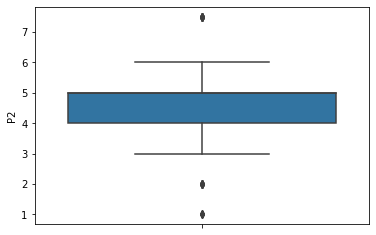

In [16]:
sns.boxplot(y=trainData["P2"])

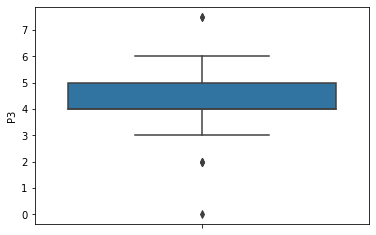

In [17]:
sns.boxplot(y=trainData["P3"])

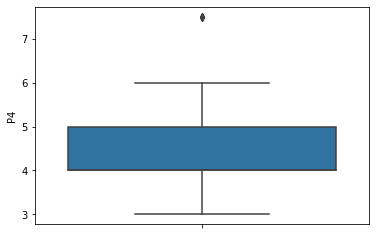

In [18]:
sns.boxplot(y=trainData["P4"])

In [13]:
# in the var3 column, there are many -999999 values....most likely these values are not accurate and probably means the data is missing, so lets replace it with the median which is 2
trainData['var3'] = trainData['var3'].replace(['-999999'],'2' )

#replace all the -999999 values in var3 column with the median value of 2.


In [14]:
#Copy Train data excluding ID column and target column, since ID column has no impact on the Data 
trainData_Copy = trainData.iloc[:, 1:-1].copy() #the : at the beginning means to select all the rows within the data
testData_Copy = testData.iloc[:, 1:-1].copy()

trainData_Copy.head()
# testData_Copy.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979


In [15]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData.columns.values)
#  TestCols = list(testData.columns.values)
# print(TrainCols)
#  print(TestCols)

In [16]:
#seperate target col from train data
X_train = trainData[TrainCols[0:len(TrainCols)-1]].copy()
Y_train = trainData[['TARGET']].copy()
print(X_train.shape)
print(Y_train.shape)
X_test = testData.copy()

(76020, 370)
(76020, 1)


In [16]:
#Create Decision Tree Classifier
clf=DecisionTreeClassifier()

# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = .2, random_state = 1)

#Apply Classifier on Train and Target - train decision tree model
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [18]:
#trial 1
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = .2, random_state = 1)
# Fit model on new Train Dataset
dt = DecisionTreeClassifier(max_depth=50, max_leaf_nodes=1000,splitter="random")
dt = dt.fit(X_train, Y_train)
X_Pred_train = dt.predict(X_train)
#Model Accuracy
print("TRAIN Accuracy:", metrics.accuracy_score(Y_train,X_Pred_train))

# check accuracy on test set
X_Pred_test = dt.predict(X_test)
#Model Accuracy on test set
print("TEST Accuracy:", metrics.accuracy_score(Y_test,X_Pred_test))


TRAIN Accuracy: 0.9733207267943764
TEST Accuracy: 0.9480434067740875


In [23]:
# Read training data file from kaggle
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

trainData.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [24]:
#seperate target col from train data
X_train = trainData[TrainCols[0:len(TrainCols)-1]].copy()
Y_train = trainData[['TARGET']].copy()
print(X_train.shape)
print(Y_train.shape)
X_test = testData.copy()

(76020, 370)
(76020, 1)


In [33]:
test_file=pd.read_csv('test.csv')

In [68]:
#trial 1
# Split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = .2, random_state = 1)
# Fit model on new Train Dataset
dt = DecisionTreeClassifier(max_depth=50, max_leaf_nodes=1000,splitter="random")
dt = dt.fit(X_train, Y_train)




X_Pred_train = dt.predict(X_train)

#Model Accuracy
print("TRAIN Accuracy:", metrics.accuracy_score(Y_train,X_Pred_train))
sample_file=pd.DataFrame(dt.predict(test_file),columns=['TARGET'])
sample_file['ID']= test_file['ID']
sample_file=sample_file.reindex(columns=['ID','TARGET'])
sample_file.to_csv(r'C:\Users\joshs\Desktop\CIS 508 Data Mining Notebooks\result1.csv', index=False)

# check accuracy on test set
X_Pred_test = dt.predict(X_test)
#Model Accuracy on test set
print("TEST Accuracy:", metrics.accuracy_score(Y_test,X_Pred_test))

TRAIN Accuracy: 1.0
TEST Accuracy: 0.9583333333333334


In [40]:
#trial 2
dt2 = DecisionTreeClassifier(max_depth=500, max_leaf_nodes=10000,splitter="random")
dt2 = dt2.fit(X_train, Y_train)

X_Pred_train = dt2.predict(X_train)
#Model Accuracy
# print("TRAIN Accuracy:", metrics.accuracy_score(Y_train,X_Pred_train))
# sample_file=pd.DataFrame(dt.predict(test_file),columns=['TARGET'])
sample_file['ID']= test_file['ID']
sample_file=sample_file.reindex(columns=['ID','TARGET'])
sample_file.to_csv(r'C:\Users\joshs\Desktop\CIS 508 Data Mining Notebooks\result2.csv', index=False)

# check accuracy on test set
X_Pred_test = dt2.predict(X_test)
#Model Accuracy on test set
print("TEST Accuracy:", metrics.accuracy_score(Y_test,X_Pred_test))

TRAIN Accuracy: 1.0
TEST Accuracy: 0.9215993727949824


In [54]:
#trial 3

dt3 = DecisionTreeClassifier(criterion= "gini", max_leaf_nodes=10, class_weight= 'balanced', min_impurity_decrease = 1e-4)
dt3 = dt3.fit(X_train, Y_train)




sample_file=pd.DataFrame(dt3.predict(test_file),columns=['TARGET']) #change dt4 here
sample_file['ID']= test_file['ID']
sample_file=sample_file.reindex(columns=['ID','TARGET'])
sample_file.to_csv(r'C:\Users\joshs\Desktop\CIS 508 Data Mining Notebooks\result3.csv', index=False)

# check accuracy on test set
X_Pred_test = dt3.predict(X_test) #change dt4 here
#Model Accuracy on test set
print("TEST Accuracy:", metrics.accuracy_score(Y_test,X_Pred_test))

TEST Accuracy: 0.8571428571428571


In [56]:
#trial 4
dt4 = DecisionTreeClassifier(criterion= "gini",max_depth=500, max_leaf_nodes=1000, class_weight= 'balanced', 
min_impurity_decrease = 1e-4 )

dt4 = dt4.fit(X_train, Y_train)

sample_file=pd.DataFrame(dt4.predict(test_file),columns=['TARGET']) #change dt4 here
sample_file['ID']= test_file['ID']
sample_file=sample_file.reindex(columns=['ID','TARGET'])
sample_file.to_csv(r'C:\Users\joshs\Desktop\CIS 508 Data Mining Notebooks\result4.csv', index=False)

# check accuracy on test set
X_Pred_test = dt4.predict(X_test) #change dt4 here
#Model Accuracy on test set
print("TEST Accuracy:", metrics.accuracy_score(Y_test,X_Pred_test))

TEST Accuracy: 0.9196428571428571


In [59]:
#trial 5
dt5 = DecisionTreeClassifier(criterion= "gini", max_depth = 10, max_leaf_nodes=10, class_weight= 'balanced',
min_impurity_decrease = 1e-4)

dt5 = dt5.fit(X_train, Y_train)

sample_file=pd.DataFrame(dt5.predict(test_file),columns=['TARGET']) #change dt4 here
sample_file['ID']= test_file['ID']
sample_file=sample_file.reindex(columns=['ID','TARGET'])
sample_file.to_csv(r'C:\Users\joshs\Desktop\CIS 508 Data Mining Notebooks\result5.csv', index=False)

# check accuracy on test set
X_Pred_test = dt5.predict(X_test) #change dt4 here
#Model Accuracy on test set
print("TEST Accuracy:", metrics.accuracy_score(Y_test,X_Pred_test))

TEST Accuracy: 0.8571428571428571


In [37]:
# Actual VS Predicted Matrix and TP,FP,TN,FN evaluation
print(confusion_matrix(Y_train, X_Pred_train))
print()

#Print Classification Report
print('Printing the precision and recall, among other metrics')
print(classification_report(Y_train,X_Pred_train))


[[58393    18]
 [ 1726   679]]

Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     58411
           1       0.97      0.28      0.44      2405

    accuracy                           0.97     60816
   macro avg       0.97      0.64      0.71     60816
weighted avg       0.97      0.97      0.96     60816



In [26]:
#Get Class Prediction as a data frame with header as Prediction
pred=pd.DataFrame(clf.predict(X_train),columns=["Prediction"])

pred.head()

,Prediction
0,0
1,0
2,0
3,0
4,0


In [27]:
#Get Class Prediction probabilities as a data frame 
#Get Prediction Probability for the predicted class as a dataframe
pred_Probability =pd.DataFrame(clf.predict_proba(X_train))

pred_Probability.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [28]:
#Write into a file with actual prediction and corresponding probability
pd.concat([pred,pred_Probability],axis=1).to_csv(r'C:\Users\joshs\Desktop\CIS 508 Data Mining Notebooks\result1.csv', index = None)
# C:\Users\joshs\Desktop\CIS 508 Data Mining Notebooks
    


In [29]:
res=pd.read_csv('result1.csv')
res.head()

,Prediction,0,1
0,0,1.0,0.0
1,0,1.0,0.0
2,0,1.0,0.0
3,0,1.0,0.0
4,0,1.0,0.0


In [49]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_183 <= 2.45
|   |--- feature_2 <= 27.50
|   |   |--- feature_369 <= 57022.04
|   |   |   |--- feature_94 <= 1.50
|   |   |   |   |--- feature_165 <= -56.39
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_165 >  -56.39
|   |   |   |   |   |--- feature_369 <= 56961.63
|   |   |   |   |   |   |--- feature_2 <= 23.50
|   |   |   |   |   |   |   |--- feature_278 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 144827.00
|   |   |   |   |   |   |   |   |   |--- feature_369 <= 55963.75
|   |   |   |   |   |   |   |   |   |   |--- feature_369 <= 37418.27
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_369 >  37418.27
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |--- feature_369 >  55963.75
|   |   |   |   |   |   |   |   |   |   |--- feature_369 <= 55982.58
|   |   |   |   |   |   |   |   |   |   |   |--- cla